In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("sample_-_superstore.xlsx")
data=pd.DataFrame(data)
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


### Remove unecessary coloumns

In [3]:
data.pop("Row ID")
data.pop("Customer ID")
data.pop("Order ID")
data.pop("Ship Date")
data.pop("Product ID")
data.pop("Postal Code")
data.pop("Quantity")
data.head(3)


,Order Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Discount,Profit
0,2016-11-08,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,0.0,41.9136
1,2016-11-08,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,0.0,219.5820
2,2016-06-12,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,0.0,6.8714


### Make new coloumns

In [4]:
# Check the data type
data.dtypes

Order Date       datetime64[ns]
Ship Mode                object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Region                   object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Discount                float64
Profit                  float64
dtype: object

In [5]:
# Check Missing value
data.isnull().sum()            

Order Date       0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Discount         0
Profit           0
dtype: int64

In [6]:
 #Make Column ("Month") & ("Year) 
# 1. Convert  Order Date = datetime64[ns] to Order Date = object

import datetime
data['Order Date'] = data['Order Date'].dt.strftime('%Y-%m-%d')
data.dtypes

Order Date        object
Ship Mode         object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Discount         float64
Profit           float64
dtype: object

In [7]:
# 2. Make new column based on existing column
## Month
data["Month"]=data['Order Date'].str[5:7]
## Year
data["Year"]=data['Order Date'].str[0:4]
data.head(3)

,Order Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Discount,Profit,Month,Year
0,2016-11-08,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,0.0,41.9136,11,2016
1,2016-11-08,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,0.0,219.5820,11,2016
2,2016-06-12,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,0.0,6.8714,06,2016


## Summary

In [8]:
# Split table based on year
df14 = data[data['Year'] =="2014"]
df15 = data[data['Year'] =="2015"]
df16 = data[data['Year'] =="2016"]
df17 = data[data['Year'] =="2017"]

#### Annual Sales

In [9]:
# 2014
sales_month14=df14.groupby("Month").sum()
#sales_month=sales_month.sort(reverse=True)
#sales_month.sort_values(by=['Sales'], ascending=False)
sales_month14

C:\Users\novir\AppData\Local\Temp\ipykernel_10116\515458862.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_month14=df14.groupby("Month").sum()


,Sales,Discount,Profit
Month,,,
01,14236.8950,10.00,2450.1907
02,4519.8920,8.10,862.3084
03,55691.0090,26.30,498.7299
04,28295.3450,14.85,3488.8352
05,23648.2870,18.95,2738.7096
06,34595.1276,23.22,4976.5244
07,33946.3930,24.55,-841.4826
08,27909.4685,20.05,5318.1050
09,81777.3508,42.87,8328.0994


In [10]:
# 2015
sales_month15=df15.groupby("Month").sum()
#sales_month=sales_month.sort(reverse=True)
#sales_month.sort_values(by=['Sales'], ascending=False)
sales_month15

C:\Users\novir\AppData\Local\Temp\ipykernel_10116\2850411893.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_month15=df15.groupby("Month").sum()


,Sales,Discount,Profit
Month,,,
01,18174.0756,10.32,-3281.0070
02,11951.4110,8.30,2813.8508
03,38726.2520,19.34,9732.0978
04,34195.2085,28.15,4187.4962
05,30131.6865,24.25,4667.8690
06,24797.2920,23.80,3335.5572
07,28765.3250,23.85,3288.6483
08,36898.3322,24.87,5355.8084
09,64595.9180,41.30,8209.1627


In [11]:
# 2016
sales_month16=df16.groupby("Month").sum()
#sales_month=sales_month.sort(reverse=True)
#sales_month.sort_values(by=['Sales'], ascending=False)
sales_month16

C:\Users\novir\AppData\Local\Temp\ipykernel_10116\2719714253.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_month16=df16.groupby("Month").sum()


,Sales,Discount,Profit
Month,,,
01,18542.4910,11.80,2824.8233
02,22978.8150,8.00,5004.5795
03,51715.8750,31.12,3611.9680
04,38750.0390,26.50,2977.8149
05,56987.7280,41.50,8662.1464
06,40344.5340,27.60,4750.3781
07,39261.9630,32.05,4432.8779
08,31115.3743,32.67,2062.0693
09,73410.0249,54.24,9328.6576


In [12]:
# 2017
sales_month17=df17.groupby("Month").sum()
#sales_month=sales_month.sort(reverse=True)
#sales_month.sort_values(by=['Sales'], ascending=False)
sales_month17

C:\Users\novir\AppData\Local\Temp\ipykernel_10116\2098433958.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_month17=df17.groupby("Month").sum()


,Sales,Discount,Profit
Month,,,
01,43971.3740,25.00,7140.4391
02,20301.1334,19.47,1613.8720
03,58872.3528,31.14,14751.8915
04,36521.5361,39.47,933.2900
05,44261.1102,36.89,6342.5828
06,52981.7257,42.12,8223.3357
07,45264.4160,31.65,6952.6212
08,63120.8880,31.30,9040.9557
09,87866.6520,67.65,10991.5556


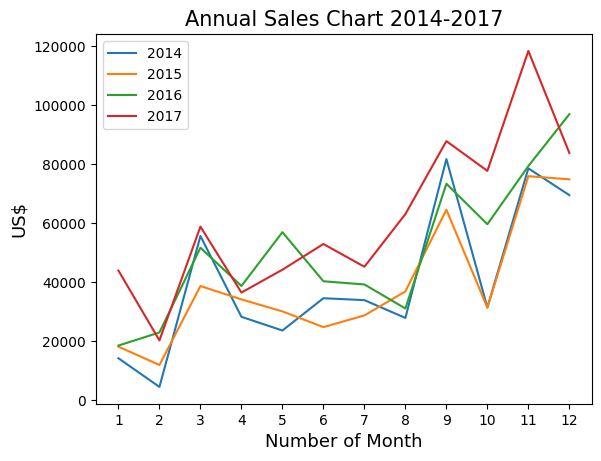

In [17]:
# Chart line year
time=[i for i in range(1,13)]


plt.plot(time, sales_month14["Sales"],label="2014")
plt.plot(time, sales_month15["Sales"],label="2015")
plt.plot(time, sales_month16["Sales"],label="2016")
plt.plot(time, sales_month17["Sales"],label="2017")

plt.title("Annual Sales Chart 2014-2017",fontsize=15)
plt.xticks(time)
plt.xlabel("Number of Month",fontsize=13)
plt.ylabel("US$",fontsize=13)

plt.legend()
plt.show()


#### Annual Profit

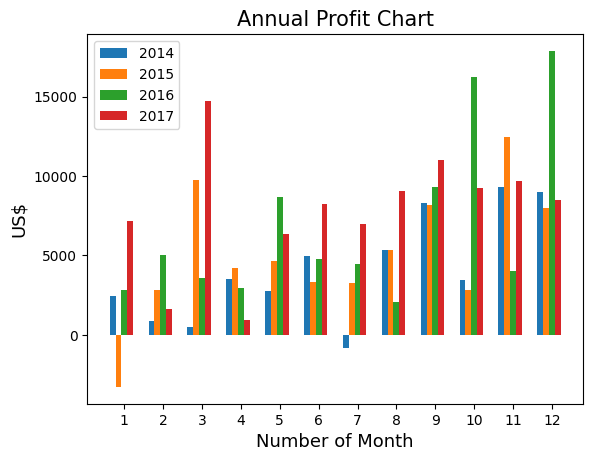

In [27]:
# Profit chart
time=[i for i in range(1,13)]
x = np.arange(len(time))


fig, ax = plt.subplots()

b1=ax.bar(x, sales_month14["Profit"],0.15,label="2014")
b2=ax.bar(x+0.15, sales_month15["Profit"],0.15,label="2015")
b3=ax.bar(x+0.3, sales_month16["Profit"],0.15,label="2016")
b4=ax.bar(x+0.45, sales_month17["Profit"],0.15,label="2017")

plt.title("Annual Profit Chart",fontsize=15)
plt.xticks(time)
plt.xlabel("Number of Month",fontsize=13)
plt.ylabel("US$",fontsize=13)


#Edit axis
ax.set_xticks(x + 0.6/ 2)
ax.set_xticklabels(time)


plt.legend()
plt.show()

C:\Users\novir\AppData\Local\Temp\ipykernel_10116\72879142.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum1=data.groupby('Month').sum()
C:\Users\novir\AppData\Local\Temp\ipykernel_10116\72879142.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum2=data.groupby('Month').sum()


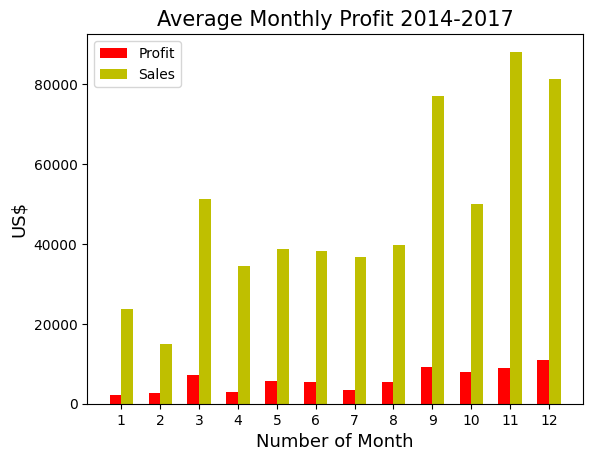

In [75]:
#  Average Monthly Profit Chart

time=[i for i in range(1,13)]
x = np.arange(len(time))+1
fig, ax = plt.subplots()

## Make new variable
sum1=data.groupby('Month').sum()
mean1=sum1["Profit"]/4
sum2=data.groupby('Month').sum()
mean2=sum2["Sales"]/4

b1=ax.bar(x, mean1, 0.3, color='r', label="Profit")
b2=ax.bar(x+0.3, mean2, 0.3, color='y', label="Sales")


## 
plt.title("Average Monthly Profit 2014-2017",fontsize=15)
plt.xticks(x)
plt.xlabel("Number of Month",fontsize=13)
plt.ylabel("US$",fontsize=13)



ax.set_xticks(x +0.3/ 2)
ax.set_xticklabels(time)
plt.legend()
plt.show()